# pyBumpHunter Example

Simple notebook for testing the pyBumpHunter.py package.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pyBumpHunter as BH
from datetime import datetime  ## Used to compute the execution time
import uproot as upr  ## Used to read data from a root file

In [14]:
#import xgboost as xgb
#import matplotlib.pyplot as plt
#import uproot as uproot
import pandas as pd
#import numpy as np
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import roc_curve, auc
import shutil
from array import array
import math
from tqdm import tqdm
import os

#print(xgb.__version__)

import ROOT
print(ROOT.gROOT.GetVersion())
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetLegendBorderSize(0)
ROOT.gStyle.SetLegendTextSize(0.035)
ROOT.gStyle.SetLegendFont(62)
ROOT.gStyle.SetLabelFont(62)

import analysisfunction

6.32.06


In [15]:
plot_folder = "test_bumphunter_SURPRISE_run4b"
blind_data = True

if not os.path.exists('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder):
    os.makedirs('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder)
    os.makedirs('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/datamc')
    os.makedirs('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/mc_only')
    os.makedirs('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/plots_2d')
    os.makedirs('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/python_plots')
    os.makedirs('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/data')
    

In [16]:
#set base ROOT color numbers (from TAttFill class ref) for use with matplotlib
kWhite  = 0   
kBlack  = 1
kGray    = 920
kRed    = 632
kGreen  = 416
kBlue   = 600
kYellow = 400
kMagenta = 616
kCyan   = 432
kOrange = 800
kSpring = 820
kTeal   = 840
kAzure   =  860
kViolet = 880
kPink   = 900

#set default color and hatching
colors = [ROOT.gROOT.GetColor(kRed+2).AsHexString(), ROOT.gROOT.GetColor(kOrange+3).AsHexString(),
          ROOT.gROOT.GetColor(kGray).AsHexString(), ROOT.gROOT.GetColor(kOrange+1).AsHexString(),
          ROOT.gROOT.GetColor(38).AsHexString(), ROOT.gROOT.GetColor(30).AsHexString(),
          ROOT.gROOT.GetColor(kOrange+1).AsHexString(), ROOT.gROOT.GetColor(kAzure+6).AsHexString(),
          ROOT.gROOT.GetColor(kGreen+1).AsHexString(), ROOT.gROOT.GetColor(kPink+5).AsHexString(),
          ROOT.gROOT.GetColor(kPink-6).AsHexString(), ROOT.gROOT.GetColor(kPink-8).AsHexString(),
          ROOT.gROOT.GetColor(kPink-7).AsHexString(), ROOT.gROOT.GetColor(kPink).AsHexString()]

hatches = ['\\\\','\\\\','\\\\','\\\\',None,None,None,None,None,None,None,None,None,]

#default = do not plot y axis as log, and do not include eff and pur in title
plotlog = False
showeffpur = False

#default legend position (upper right corner)
legx1 = 0.45
legy1 = 0.55
legx2 = 0.85
legy2 = 0.85

#POT information
run1dataPOT = 0.0
run2dataPOT = 0.0
run3dataPOT = 0.0

run1dataPOT = 1.42549e+20
run2dataPOT = 2.54086e+20
run3dataPOT = 2.37673e+20
run4dataPOT = 1.07e+20 #8.958e+19

run4dataSpills = 25401921.0 #21262204.0

run1frac = 1.42549
run2frac = 2.54086
run3frac = 2.37673
run4frac = 1.07

run4ExtBnbSpills = 88445969.0

run1ExtBnbPOT = 2.02672e+20 #6.67349e+19
run2ExtBnbPOT = 3.60832e+20
run3ExtBnbPOT = 5.19263e+20
run4ExtBnbPOT = (run4dataPOT / run4dataSpills) * run4ExtBnbSpills
print(run4ExtBnbPOT)

#run1dataSpills =  6.9301e+06
#run3dataSpills = 0.0
#run1BnbPOT = 7.87981e+20   #4.14781e+20#1.16272e20
#run3BnbPOT = 6.28739e+20
#run1ExtBnbSpills = 1.488e+07
#run3ExtBnbSpills = 8.81379e+06
#run1DirtPOT = 3.56173e+20   #1.51589e+20
#run3DirtPOT = 3.59228e+20

Numu_Cut = 0.4 #0000000000000036 #0.10000000000000009  
Other_Cut = 0.2 #0000000000000018 #-0.3999999999999999  
NC_Pi0_Cut = -0.05 #999999999999982 #-0.3999999999999999  
Nue_Cut = -1.0 #-3.0

#Numu_Cut = 0.1 #-3.0 #0.40000000000000036 #0.10000000000000009  
#Other_Cut = -0.4 #0.20000000000000018 #-0.3999999999999999  
#NC_Pi0_Cut = -0.4 #-0.04999999999999982 #-0.3999999999999999  
#Nue_Cut = -3.0 #-1.0 #-3.0  

#files
nu_overlay_1="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_bnboverlay_run1_sp.root"       
nu_overlay_2="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_bnboverlay_run2_sp.root"      
nu_overlay_3="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_bnboverlay_run3_sp_1.root"     
DIRT_1="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_dirt_run1_sp.root"              
DIRT_2="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_dirt_run2_sp.root"              
DIRT_3="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_dirt_run3_sp.root"              
EXTBNB_1="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_extbnb_run1_sp.root"        
EXTBNB_2="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_extbnb_D2_run2_sp.root"         
EXTBNB_3="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_extbnb_run3_sp.root"         
BNB_1="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_bnb_run1_full.root"         
BNB_2="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_bnb_run2_full.root"               
BNB_3="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_bnb_run3_full.root"               
sp_overlay_1="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_inclusivephoton_run1_cv.root"
sp_overlay_2="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_inclusivephoton_run2_cv.root"
sp_overlay_3="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_inclusivephoton_run3_cv.root"
ncpi0_overlay_1="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_ncpi0_run1_sp.root"
ncpi0_overlay_2="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_ncpi0_run2_sp.root"
ncpi0_overlay_3="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_ncpi0_run3_sp.root"
lee_1="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_LEE_1g0p_run1_half.root"

nu_overlay_4b="/Users/eyandel/Documents/MicroBooNE/processed_checkout_rootfiles/run4b/MCC9.10_Run4b_v10_04_07_09_BNB_nu_overlay_surprise_reco2_hist.root"
DIRT_4b="/Users/eyandel/Documents/MicroBooNE/processed_checkout_rootfiles/run4b/MCC9.10_Run4b_v10_04_07_09_BNB_dirt_surpise_reco2_hist.root"
EXTBNB_4b="/Users/eyandel/Documents/MicroBooNE/processed_checkout_rootfiles/run4b/MCC9.10_Run4b_v10_04_07_09_Run4b_BNB_beam_off_surprise_reco2_hist.root"
BNB_4b="/Users/eyandel/Documents/MicroBooNE/processed_checkout_rootfiles/run4b/MCC9.10_Run4b_v10_04_07_10_BNB_beam_on_surprise_mix_makeups.root"
nue_overlay_4b="/Users/eyandel/Documents/MicroBooNE/processed_checkout_rootfiles/run4b/MCC9.10_Run4b_v10_04_07_09_BNB_nue_overlay_surprise_reco2_hist.root"
ncpi0_overlay_4b="/Users/eyandel/Documents/MicroBooNE/processed_checkout_rootfiles/run4b/MCC9.10_Run4b_v10_04_07_09_BNB_NC_pi0_overlay_surprise_reco2_hist.root"

#BNB_1 = ncpi0_overlay_1
#BNB_2 = ncpi0_overlay_2
#BNB_3 = ncpi0_overlay_3

3.72559173103483e+20


In [17]:
##FOR USING AN OVERLAY AS DATA
run1dataPOT = analysisfunction.GetPOT(ncpi0_overlay_1)
run2dataPOT = analysisfunction.GetPOT(ncpi0_overlay_2)
run3dataPOT = analysisfunction.GetPOT(ncpi0_overlay_3)

1.2771014098929228e+21
6.710204772333e+21
1.2311733857349017e+21


In [18]:
pot_vars = [
        ("run1BnbPOT", nu_overlay_1),
        ("run2BnbPOT", nu_overlay_2),
        ("run3BnbPOT", nu_overlay_3),
        ("run4BnbPOT", nu_overlay_4b),
        ("run1DirtPOT", DIRT_1),
        ("run2DirtPOT", DIRT_2),
        ("run3DirtPOT", DIRT_3),
        ("run4DirtPOT", DIRT_4b),
        ("run1SPPOT", sp_overlay_1),
        ("run2SPPOT", sp_overlay_2),
        ("run3SPPOT", sp_overlay_3),
        ("run1NCPi0POT", ncpi0_overlay_1),
        ("run2NCPi0POT", ncpi0_overlay_2),
        ("run3NCPi0POT", ncpi0_overlay_3),
        ("run4NCPi0POT", ncpi0_overlay_4b),
    ]

for var_name, file_name in pot_vars:
    globals()[var_name] = analysisfunction.GetPOT(file_name)

7.303211076491763e+20
9.049534941552791e+20
6.281006245845998e+20
7.876404293443845e+20
3.561395382175706e+20
7.533552993217751e+20
3.591920851932946e+20
3.0585834124312714e+20
8.151040776494641e+21
7.387567278135982e+21
9.98563866382949e+21
1.2771014098929228e+21
6.710204772333e+21
1.2311733857349017e+21
5.011709678602291e+21


# Load input files


In [19]:


#all_df_in_bdt_sp_overlay, all_df_in_pfeval_sp_overlay, all_df_in_kine_sp_overlay, all_df_in_eval_sp_overlay = analysisfunction.LoadTreesData(sp_overlay_1, sp_overlay_2, sp_overlay_3)


all_df_in_bdt_over, all_df_in_pfeval_over, all_df_in_kine_over, all_df_in_eval_over = analysisfunction.LoadTreesTruth(nu_overlay_1, nu_overlay_2, nu_overlay_3)

all_df_in_bdt_over = analysisfunction.LoadBNBOverlay(all_df_in_bdt_over, all_df_in_pfeval_over, all_df_in_kine_over, all_df_in_eval_over)
del all_df_in_pfeval_over
del all_df_in_eval_over
del all_df_in_kine_over

In [20]:
all_df_in_bdt_over, all_df_in_pfeval_over, all_df_in_kine_over, all_df_in_eval_over, all_df_in_time_over, all_df_in_pelee_over = analysisfunction.LoadTreesTruth1(nu_overlay_4b, su = True)

all_df_in_bdt_over = analysisfunction.LoadBNBOverlay(all_df_in_bdt_over, all_df_in_pfeval_over, all_df_in_kine_over, all_df_in_eval_over, all_df_in_time_over, all_df_in_pelee_over)
del all_df_in_pfeval_over
del all_df_in_eval_over
del all_df_in_kine_over
del all_df_in_time_over
del all_df_in_pelee_over

all_df_in_bdt_dirt, all_df_in_pfeval_dirt, all_df_in_kine_dirt, all_df_in_eval_dirt = analysisfunction.LoadTreesTruth(DIRT_1, DIRT_2, DIRT_3)

all_df_in_bdt_dirt = analysisfunction.LoadDirt(all_df_in_bdt_dirt, all_df_in_pfeval_dirt, all_df_in_kine_dirt, all_df_in_eval_dirt)
del all_df_in_pfeval_dirt
del all_df_in_eval_dirt
del all_df_in_kine_dirt

In [21]:
all_df_in_bdt_dirt, all_df_in_pfeval_dirt, all_df_in_kine_dirt, all_df_in_eval_dirt, all_df_in_time_dirt, all_df_in_pelee_dirt = analysisfunction.LoadTreesTruth1(DIRT_4b, su = True)

all_df_in_bdt_dirt = analysisfunction.LoadDirt(all_df_in_bdt_dirt, all_df_in_pfeval_dirt, all_df_in_kine_dirt, all_df_in_eval_dirt, all_df_in_time_dirt, all_df_in_pelee_dirt)
del all_df_in_pfeval_dirt
del all_df_in_eval_dirt
del all_df_in_kine_dirt
del all_df_in_time_dirt
del all_df_in_pelee_dirt

all_df_in_bdt_extbnb, all_df_in_pfeval_extbnb, all_df_in_kine_extbnb, all_df_in_eval_extbnb = analysisfunction.LoadTreesData(EXTBNB_1, EXTBNB_2, EXTBNB_3)

all_df_in_bdt_ext = analysisfunction.LoadExtBnb(all_df_in_bdt_extbnb, all_df_in_pfeval_extbnb, all_df_in_kine_extbnb, all_df_in_eval_extbnb)
del all_df_in_pfeval_extbnb
del all_df_in_eval_extbnb
del all_df_in_kine_extbnb

In [22]:
all_df_in_bdt_extbnb, all_df_in_pfeval_extbnb, all_df_in_kine_extbnb, all_df_in_eval_extbnb, all_df_in_time_extbnb, all_df_in_pelee_extbnb = analysisfunction.LoadTreesData1(EXTBNB_4b, su = True)

all_df_in_bdt_ext = analysisfunction.LoadExtBnb(all_df_in_bdt_extbnb, all_df_in_pfeval_extbnb, all_df_in_kine_extbnb, all_df_in_eval_extbnb, all_df_in_time_extbnb, all_df_in_pelee_extbnb)
del all_df_in_pfeval_extbnb
del all_df_in_eval_extbnb
del all_df_in_kine_extbnb
del all_df_in_time_extbnb
del all_df_in_pelee_extbnb

#all_df_in_bdt_bnb, all_df_in_pfeval_bnb, all_df_in_kine_bnb, all_df_in_eval_bnb = analysisfunction.LoadTreesData(BNB_1, BNB_2, BNB_3)
all_df_in_bdt_bnb, all_df_in_pfeval_bnb, all_df_in_kine_bnb, all_df_in_eval_bnb = analysisfunction.LoadTreesData(ncpi0_overlay_1, ncpi0_overlay_2, ncpi0_overlay_3)


all_df_in_bdt_data = analysisfunction.LoadBnb(all_df_in_bdt_bnb, all_df_in_pfeval_bnb, all_df_in_kine_bnb, all_df_in_eval_bnb)
del all_df_in_pfeval_bnb
del all_df_in_eval_bnb
del all_df_in_kine_bnb

In [23]:
all_df_in_bdt_bnb, all_df_in_pfeval_bnb, all_df_in_kine_bnb, all_df_in_eval_bnb, all_df_in_time_bnb, all_df_in_pelee_bnb = analysisfunction.LoadTreesData1(BNB_4b, su = True)
#all_df_in_bdt_bnb, all_df_in_pfeval_bnb, all_df_in_kine_bnb, all_df_in_eval_bnb = analysisfunction.LoadTreesData1(ncpi0_overlay_4b, su = True)


all_df_in_bdt_data = analysisfunction.LoadBnb(all_df_in_bdt_bnb, all_df_in_pfeval_bnb, all_df_in_kine_bnb, all_df_in_eval_bnb, all_df_in_time_bnb, all_df_in_pelee_bnb)
del all_df_in_pfeval_bnb
del all_df_in_eval_bnb
del all_df_in_kine_bnb
del all_df_in_time_bnb
del all_df_in_pelee_bnb

all_df_in_bdt_ncpi0, all_df_in_pfeval_ncpi0, all_df_in_kine_ncpi0, all_df_in_eval_ncpi0 = analysisfunction.LoadTreesTruth(ncpi0_overlay_1, ncpi0_overlay_2, ncpi0_overlay_3)

all_df_in_bdt_ncpi0 = analysisfunction.LoadNCPi0Overlay(all_df_in_bdt_ncpi0, all_df_in_pfeval_ncpi0, all_df_in_kine_ncpi0, all_df_in_eval_ncpi0)
del all_df_in_pfeval_ncpi0
del all_df_in_eval_ncpi0
del all_df_in_kine_ncpi0

In [24]:
all_df_in_bdt_ncpi0, all_df_in_pfeval_ncpi0, all_df_in_kine_ncpi0, all_df_in_eval_ncpi0, all_df_in_time_ncpi0, all_df_in_pelee_ncpi0 = analysisfunction.LoadTreesTruth1(ncpi0_overlay_4b, su = True)

all_df_in_bdt_ncpi0 = analysisfunction.LoadNCPi0Overlay(all_df_in_bdt_ncpi0, all_df_in_pfeval_ncpi0, all_df_in_kine_ncpi0, all_df_in_eval_ncpi0, all_df_in_time_ncpi0, all_df_in_pelee_ncpi0)
del all_df_in_pfeval_ncpi0
del all_df_in_eval_ncpi0
del all_df_in_kine_ncpi0
del all_df_in_time_ncpi0
del all_df_in_pelee_ncpi0

In [25]:
all_df = pd.concat([all_df_in_bdt_over, all_df_in_bdt_dirt, all_df_in_bdt_ext, all_df_in_bdt_data], ignore_index=True, sort=False)

In [26]:
del all_df_in_bdt_over
del all_df_in_bdt_dirt
del all_df_in_bdt_ext
del all_df_in_bdt_data

In [28]:
num_evts = all_df.shape[0]

y = all_df["true_event_type"].to_numpy()

w = []
#w = analysisfunction.CalculateWeights(all_df, run1dataPOT+run2dataPOT+run3dataPOT, run1ExtBnbPOT+run2ExtBnbPOT+run3ExtBnbPOT, pot_vars)
w = analysisfunction.CalculateWeights(all_df, run4dataPOT, run4ExtBnbPOT, pot_vars, run4 = True)

7.303211076491763e+20
9.049534941552791e+20
6.281006245845998e+20
7.876404293443845e+20
3.561395382175706e+20
7.533552993217751e+20
3.591920851932946e+20
3.0585834124312714e+20
8.151040776494641e+21
7.387567278135982e+21
9.98563866382949e+21
1.2771014098929228e+21
6.710204772333e+21
1.2311733857349017e+21
5.011709678602291e+21


In [29]:
weights_sig, weights_bkg, weights_data = analysisfunction.GetVariableArrays(all_df, "weights", "weights", [])
    
        
num_sig_tot=np.sum(weights_sig) #/ 0.83

# Make data, bkg, sig

In [44]:
#make input arrays for bump hunter
hist_input = False

sig_no, bkg, data = analysisfunction.GetVariableArrays(all_df, "kine_pio_mass","pi0_mass", [], "ncpi0_sideband")

sig_scale = 1.5
sig_raw, bkg_sig, data_sig = analysisfunction.GetVariableArrays(all_df_in_bdt_ncpi0, "kine_pio_mass","pi0_mass", [-3], "ncpi0_sideband")
w = analysisfunction.CalculateWeights(all_df_in_bdt_ncpi0, run4dataPOT, run4ExtBnbPOT, pot_vars, run4 = True)
w_sig_in, w_bkg_sig, w_data_sig = analysisfunction.GetVariableArrays(all_df_in_bdt_ncpi0, "weights", "w", [-3], "ncpi0_sideband")

sig = [x * sig_scale for x in sig_raw]

w_sig, w_bkg, w_data = analysisfunction.GetVariableArrays(all_df, "weights", "w", [], "ncpi0_sideband")

sig = np.array(sig)
bkg = np.array(bkg)
data = np.array(data)

7.303211076491763e+20
9.049534941552791e+20
6.281006245845998e+20
7.876404293443845e+20
3.561395382175706e+20
7.533552993217751e+20
3.591920851932946e+20
3.0585834124312714e+20
8.151040776494641e+21
7.387567278135982e+21
9.98563866382949e+21
1.2771014098929228e+21
6.710204772333e+21
1.2311733857349017e+21
5.011709678602291e+21


In [45]:
print(sig)

[232.67664 192.14429 220.46527 ... 209.77753  70.14368  61.35598]


## For hist inputs

hist_input = True

#Open the file
File = upr.open('/Users/eyandel/Documents/MicroBooNE/bump/data/0p_600_data_hists.root')
File.items()

#Background
bkg = File['bkg'].values()

#Data
data = File['data'].values()

#Signal
sig = File['sig'].values()

In [46]:
if blind_data:
    data = np.zeros_like(data)

In [51]:
# Position of the bump in the data
#Lth = 5.5

# Range for the histogram
rang = [0,1500]
binnum = 50

bkg.shape

(5455,)

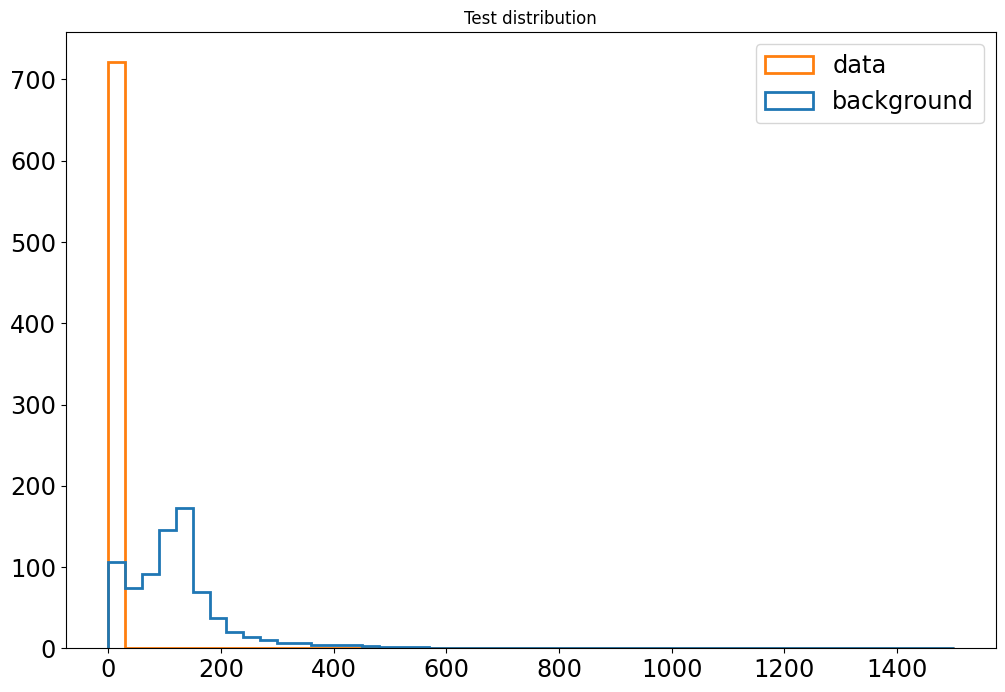

In [52]:
# Plot the 2 distributions (data and background)
if hist_input:
    F = plt.figure(figsize=(12,8))
    plt.title("Test distribution")
    # Since bkg and data are already arrays of bin contents, use bar plot to show them
    bin_edges = np.linspace(rang[0], rang[1], len(bkg)+1)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    plt.bar(bin_centers, bkg, width=bin_edges[1]-bin_edges[0], align='center', alpha=0.5, label='background', color='C0', edgecolor='C0')
    plt.errorbar(bin_centers, data, yerr=np.sqrt(data), fmt='o', label='data', color='C1')
    plt.legend(fontsize='xx-large')
    plt.xticks(fontsize='xx-large')
    plt.yticks(fontsize='xx-large')
    plt.show()
    F.savefig('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/datamc/distribution_input.png', format='png',facecolor='white', transparent=False)
else:
    # if input arrays instead of input hists
    F = plt.figure(figsize=(12,8))
    plt.title("Test distribution")
    plt.hist(
        [bkg, data],
        bins=binnum,
        histtype="step",
        range=rang,
        label=["background", "data"],
        linewidth=2,
        weights=[w_bkg, w_data],
    )
    plt.legend(fontsize='xx-large')
    plt.xticks(fontsize='xx-large')
    plt.yticks(fontsize='xx-large')
    plt.show()
    F.savefig('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/datamc/distribution_input.png', format='png',facecolor='white', transparent=False)



## Create a BumpHunter1D class instance.

The BumpHunte1Dr class provides all the methods required to "bump hunt" in ease.

All the parameters and results are also stored in this object.

In [53]:
hunter = BH.BumpHunter1D(
    rang=rang,
    width_min=1,
    width_max=10,
    width_step=1,
    scan_step=1,
    npe=400000,
    nworker=1,
    seed=666,
    bins=binnum,
    weights=w_bkg,
)

if hist_input:
    hunter = BH.BumpHunter1D(
        rang=rang,
        width_min=1,
        width_max=10,
        width_step=1,
        scan_step=1,
        npe=400000,
        nworker=1,
        seed=666,
        bins=binnum,
    )

## Call the BumpScan Method

The function will scan the data distribution using variable-width window sizes (between width_min and width_max) and calculate the p-value of data with respect to the background for each window. The minimum p-value obtained from all windows is the local p-value.

To cope with the look-elsewhere effect a global p-value is calculated using a two-step procedure:
- the distribution of possible p-values is determined from background-only pseudo-experiments (npe parameter)
- the p-value found in data is compared to the background-only p-value distribution to calculate the global p-value

In [54]:
print('####bump_scan call####')
begin = datetime.now()
hunter.bump_scan(data, bkg, is_hist=hist_input)
end = datetime.now()
print(f'time={end - begin}')
print('')

####bump_scan call####
Generating histograms
10 values of width will be tested
SCAN
Global p-value : 0.0000  (0 / 400000)
Significance > 4.56479 (lower limit)

time=0:04:45.642617



## Print results of BH scan

Print information on more significant window ("bump"): location, width, excess over background events, global p-value and global significance.

In [55]:
with open('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/bump_scan.txt', 'w') as f:
    f.write(hunter.bump_info(data))
print(hunter.bump_info(data))
#print(f'   mean (true) = {Lth}')

Bump edges : [0, 30]  (loc=0, width=1)
Bump mean | width : 15 | 30
Evaluated number of signal events : 616
Local p-value | test statistic : 0 | inf
Local significance : inf
Global p-value : 0
Global significance : >4.56  (lower limit)


## Tomography plot

This figure shows the p-value in each of the windows used to scan the data distribution.

In [56]:
#hunter.plot_tomography(data)

## Show most significant window

Window with the lowest p-value obtained from the data scans.

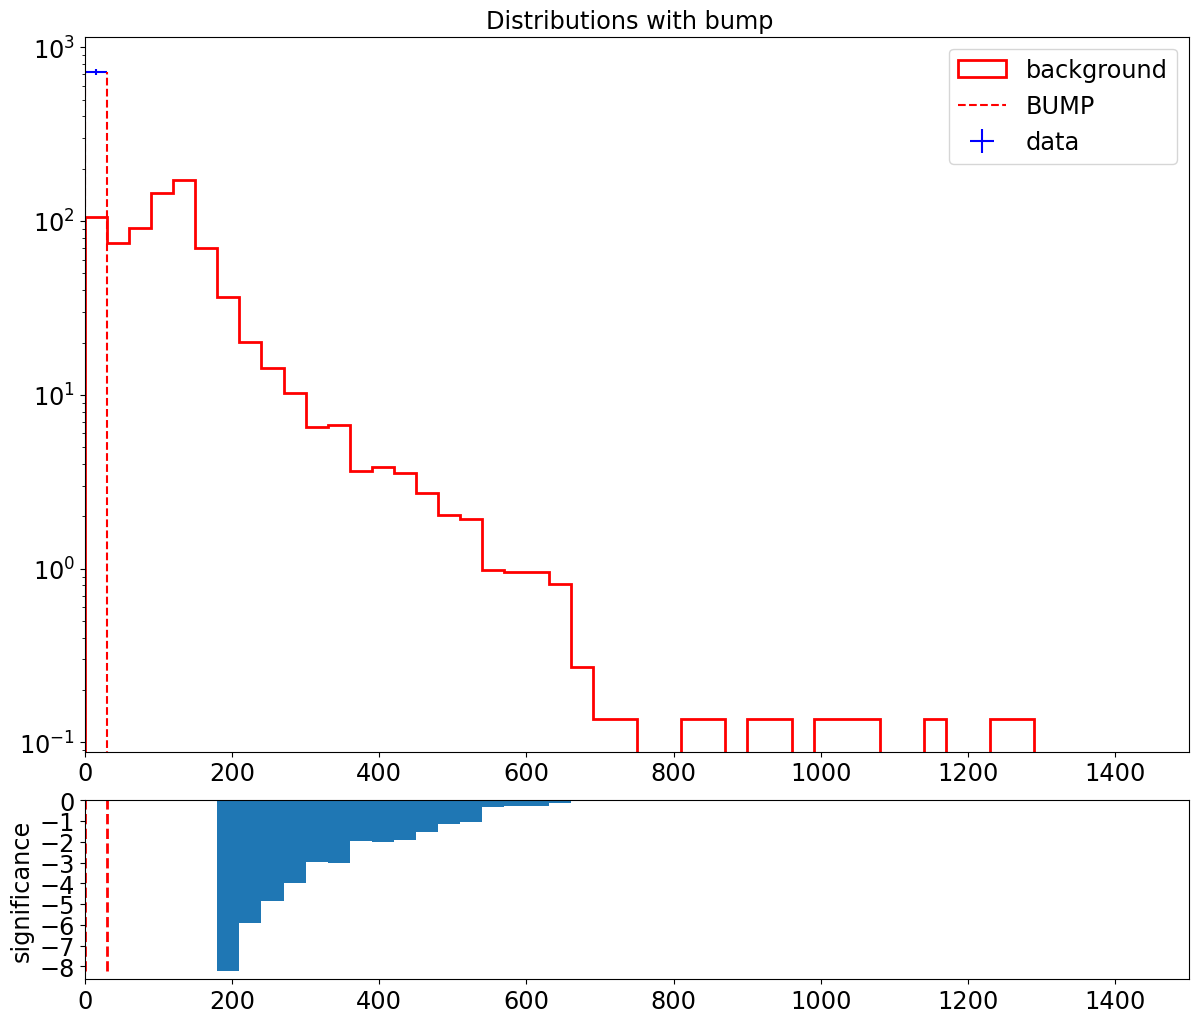

In [57]:
hunter.plot_bump(data, bkg, is_hist=hist_input, filename='/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/datamc/bump_scan.png')
hunter.plot_bump(data, bkg, is_hist=hist_input)

# Global p-value

This figure shows the test statistics (log(p-value)) obtained from background-only toys and the p-value obtained from data. The global p-value is equal to the fraction of background-only experiments which have a higher test statistics than for the data (i.e. this is the p-value of p-values).

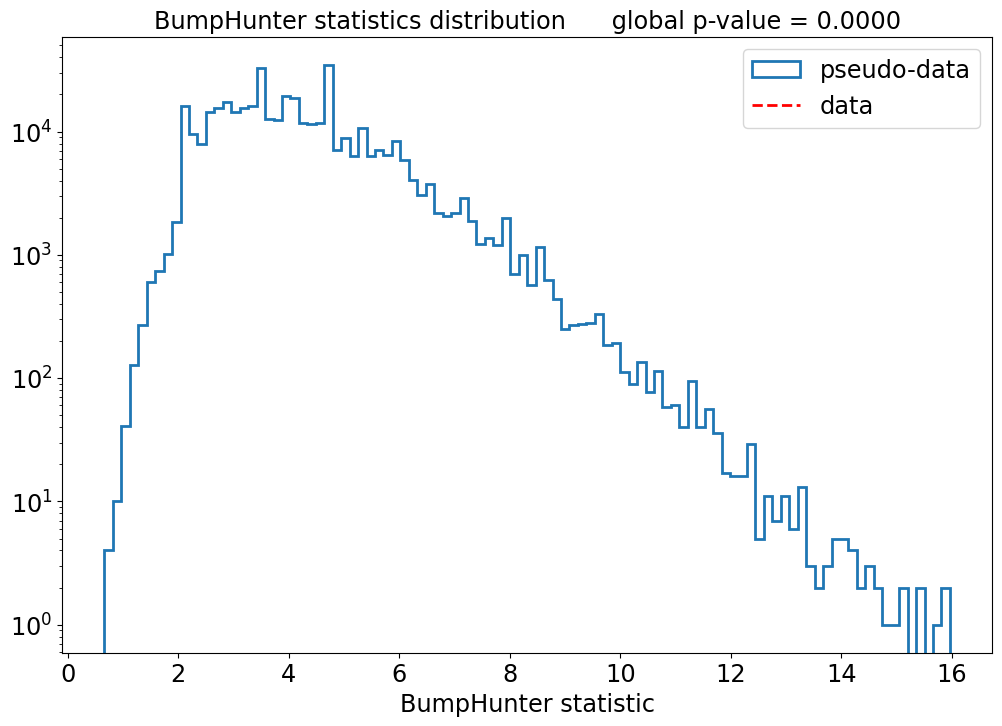

In [58]:
hunter.plot_stat(show_Pval=True)

## Signal injection

Inject signal in data until a 5 sigma excess is found. 

In [59]:
len(sig)

21033

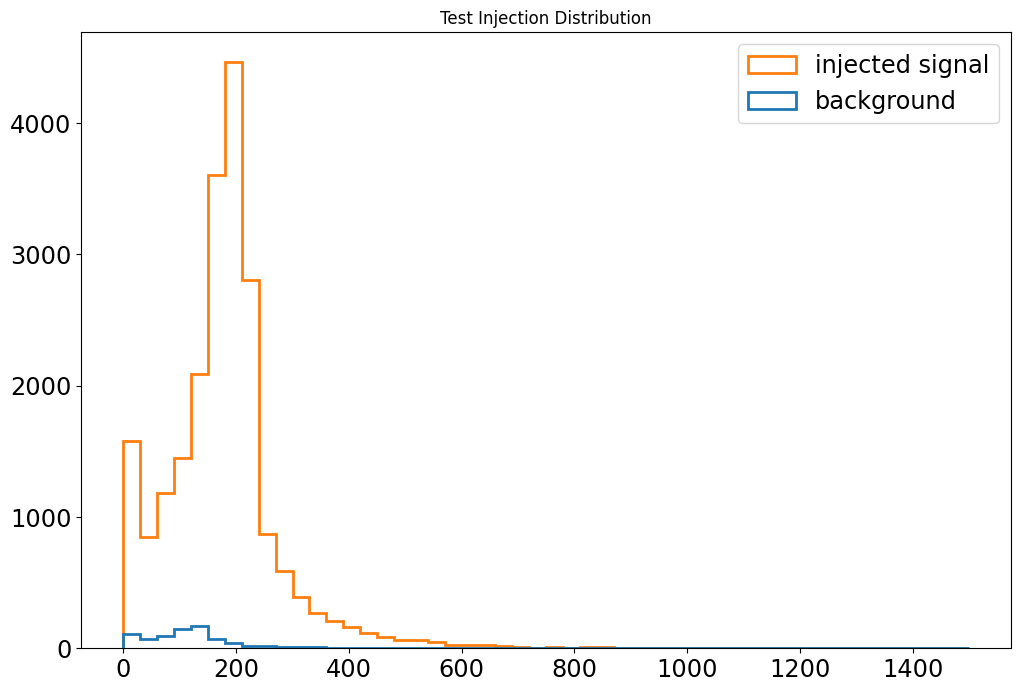

In [63]:
# Plot the 2 distributions (data and background)
if hist_input:
    F = plt.figure(figsize=(12,8))
    plt.title("Test distribution")
    # Since bkg and data are already arrays of bin contents, use bar plot to show them
    bin_edges = np.linspace(rang[0], rang[1], len(bkg)+1)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    plt.bar(bin_centers, bkg, width=bin_edges[1]-bin_edges[0], align='center', alpha=0.5, label='background', color='C0', edgecolor='C0')
    plt.errorbar(bin_centers, sig, yerr=np.sqrt(sig), fmt='o', label='injected signal', color='C1')
    plt.legend(fontsize='xx-large')
    plt.xticks(fontsize='xx-large')
    plt.yticks(fontsize='xx-large')
    plt.show()
    F.savefig('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/mc_only/distribution_inject_'+str(sig_scale)+'.png', format='png',facecolor='white', transparent=False)
else:
    # if input arrays instead of input hists
    F = plt.figure(figsize=(12,8))
    plt.title("Test Injection Distribution")
    plt.hist(
        [bkg, sig],
        bins=binnum,
        histtype="step",
        range=rang,
        label=["background", "injected signal"],
        linewidth=2,
        weights=[w_bkg, w_sig_in],
    )
    plt.legend(fontsize='xx-large')
    plt.xticks(fontsize='xx-large')
    plt.yticks(fontsize='xx-large')
    plt.show()
    F.savefig('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/mc_only/distribution_inject_'+str(sig_scale)+'.png', format='png',facecolor='white', transparent=False)

In [ ]:
# We have to set additionnal parameters specific to the signal injection.
# All the parameters defined previously are kept.
hunter.sigma_limit = 4.5
hunter.str_min = 0.001 # if str_scale='log', the real starting value is 10**str_min
hunter.str_step = 0.0005
hunter.str_scale = 'lin' #'log'
hunter.signal_exp = len(sig) #150 # Correspond the the real number of signal events generated when making the data
hunter.npe_inject = 2000

print('####signal_inject call####')
begin = datetime.now()
hunter.signal_inject(sig,bkg,is_hist=hist_input)
end = datetime.now()
print(f'time={end - begin}')
print('')

####signal_inject call####
Generating background only histograms
10 values of width will be tested
BACKGROUND ONLY SCAN
STARTING INJECTION
   STEP 1 : signal strength = 0.01
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0000  (0 / 400000)   0.0000  (0)   0.0000  (0)
Significance = 4.56479 (4.56479  4.56479)

REACHED SIGMA LIMIT
   Number of signal event injected : 210.33
   Signal strength : 0.0100

time=0:04:48.466889



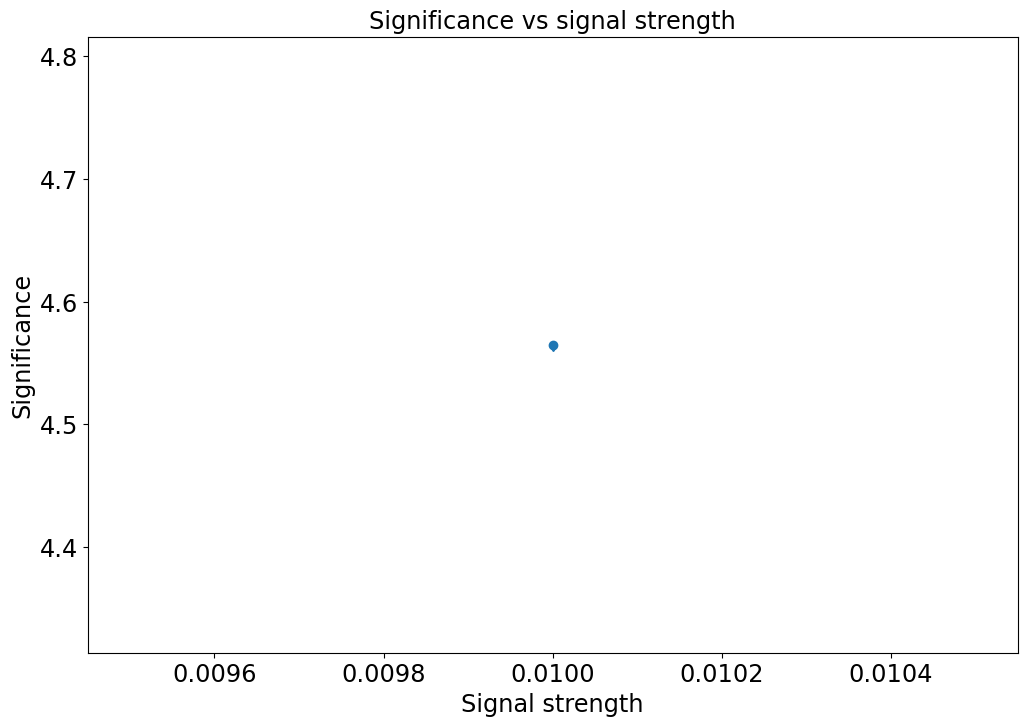

In [65]:
# Get the injection plot (with linear and log scale axis)
hunter.plot_inject()
hunter.plot_inject(filename = '/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/mc_only/signal_inject_sig_'+str(sig_scale)+'.png')

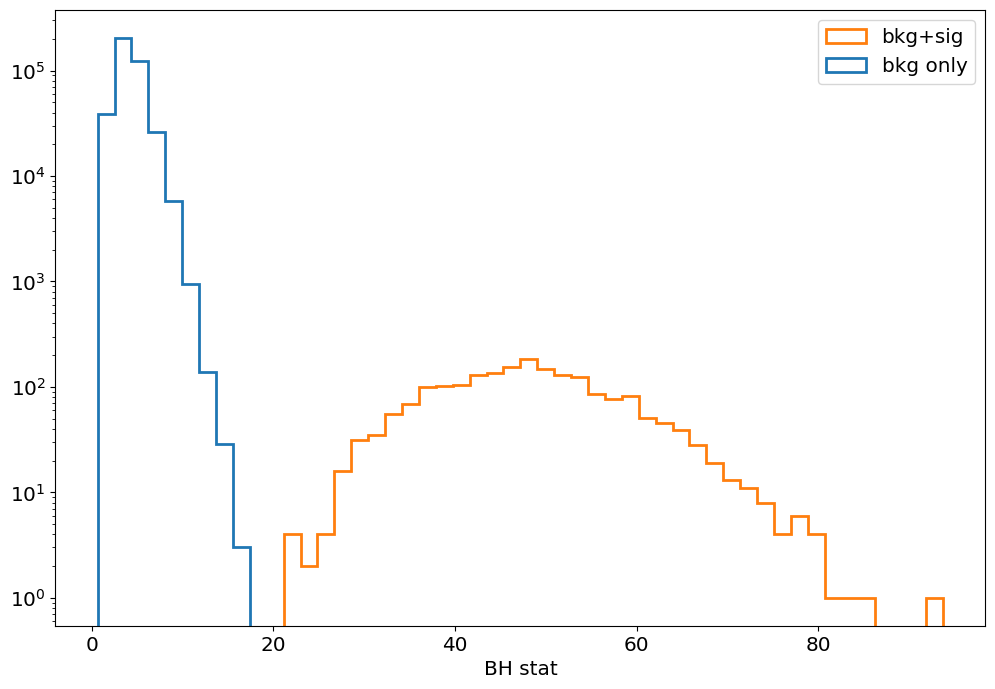

In [66]:
F = plt.figure(figsize=(12,8))
plt.hist(
    [hunter.t_ar[:hunter.npe],hunter.t_ar[hunter.npe:]],
    bins=50,
    histtype='step',
    lw=2,
    label=['bkg only', 'bkg+sig']
)
plt.legend(fontsize='x-large')
plt.xlabel('BH stat', size='x-large')
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.yscale('log')
plt.show()
F.savefig('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/mc_only/BHstat_inject_'+str(sig_scale)+'.png', format='png',facecolor='white', transparent=False)

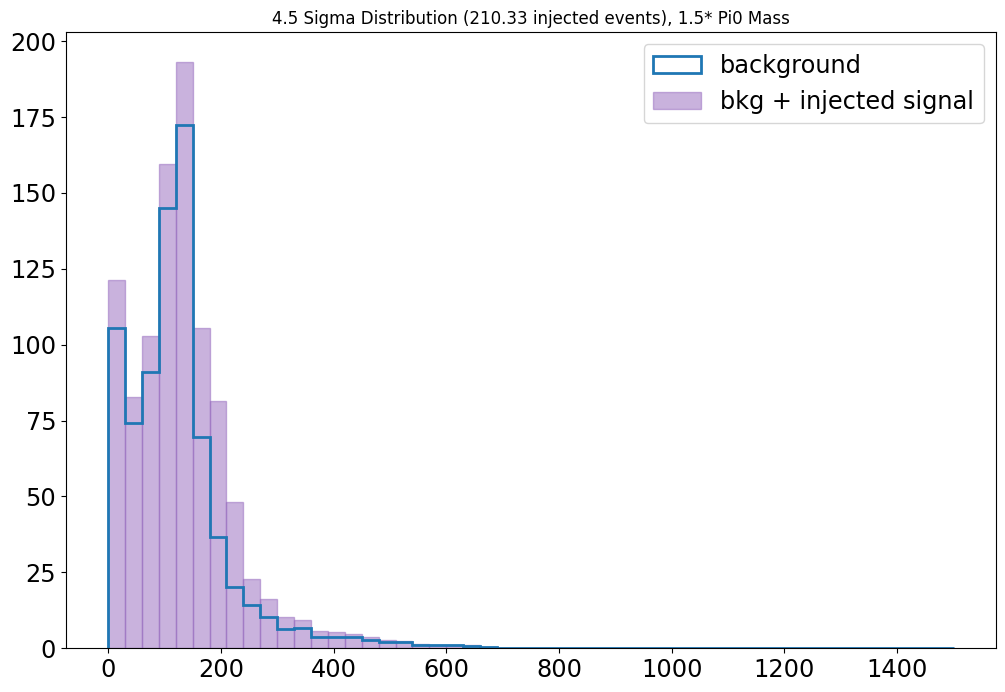

In [67]:
# Plot the signal injected distribution
F = plt.figure(figsize=(12,8))
plt.title("4.5 Sigma Distribution (" + str(hunter.signal_min) + " injected events), " + str(sig_scale) + "* Pi0 Mass")
# Since bkg and data are already arrays of bin contents, use bar plot to show them
bin_edges = np.linspace(rang[0], rang[1], len(hunter.data_inject)+1)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.bar(bin_centers, hunter.data_inject, width=bin_edges[1]-bin_edges[0], align='center', alpha=0.5, label='bkg + injected signal', color='C4', edgecolor='C4')
#plt.errorbar(bin_centers, sig, yerr=np.sqrt(sig), fmt='o', label='injected signal', color='C1')
plt.hist(
        [bkg],
        bins=binnum,
        histtype="step",
        range=rang,
        label=["background"],
        linewidth=2,
        weights=[w_bkg],
    )
plt.legend(fontsize='xx-large')
plt.xticks(fontsize='xx-large')
plt.yticks(fontsize='xx-large')
plt.show()
F.savefig('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/mc_only/signal_inject_'+str(sig_scale)+'.png', format='png',facecolor='white', transparent=False)

# Loop over different scalings

Scaling Mass by 0.2


ValueError: weights should have the same shape as x

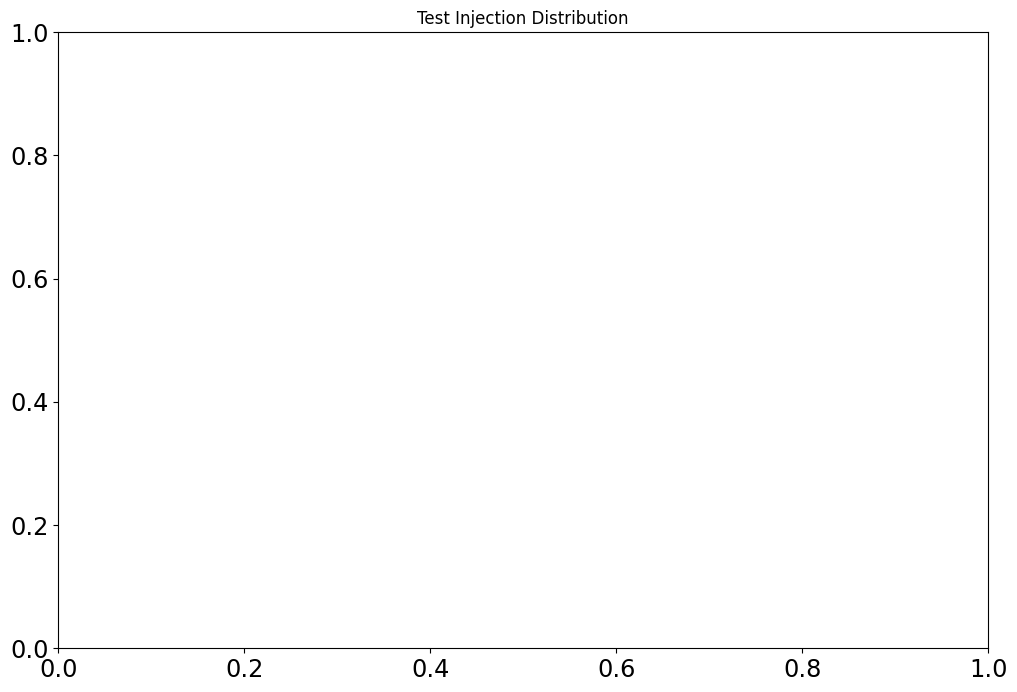

In [ ]:
for s in range(1, 10):
    print (f"Scaling Mass by {s*0.2}")

    sig_scale = s * 0.2
    sig = [x * sig_scale for x in sig_raw]
    sig = np.array(sig)

    F = plt.figure(figsize=(12,8))
    plt.title("Test Injection Distribution")
    plt.hist(
        [bkg, sig],
        bins=binnum,
        histtype="step",
        range=rang,
        label=["background", "injected signal"],
        linewidth=2,
        weights=[w_bkg, w_sig_in],
    )
    plt.xlabel('Pi0 Mass (MeV)', size='xx-large')
    plt.legend(fontsize='xx-large')
    plt.xticks(fontsize='xx-large')
    plt.yticks(fontsize='xx-large')
    plt.show()
    F.savefig('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/mc_only/distribution_inject_'+str(sig_scale)+'.png', format='png',facecolor='white', transparent=False)

    hunter.signal_exp = len(sig) #150 # Correspond the the real number of signal events generated when making the data
    print('####signal_inject call####')
    begin = datetime.now()
    hunter.signal_inject(sig,bkg,is_hist=hist_input)
    end = datetime.now()
    print(f'time={end - begin}')
    print('')    

    hunter.plot_inject(filename = '/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/mc_only/signal_inject_sig_'+str(sig_scale)+'.png')

    F = plt.figure(figsize=(12,8))
    plt.hist(
        [hunter.t_ar[:hunter.npe],hunter.t_ar[hunter.npe:]],
        bins=50,
        histtype='step',
        lw=2,
        label=['bkg only', 'bkg+sig']
    )
    plt.legend(fontsize='x-large')
    plt.xlabel('BH stat', size='x-large')
    plt.xticks(fontsize='x-large')
    plt.yticks(fontsize='x-large')
    plt.yscale('log')
    plt.show()
    F.savefig('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/mc_only/BHstat_inject_'+str(sig_scale)+'.png', format='png',facecolor='white', transparent=False)

    # Plot the signal injected distribution
    F = plt.figure(figsize=(12,8))
    plt.title("4.5 Sigma Distribution (" + str(hunter.signal_min) + " injected events), " + str(sig_scale) + "* Pi0 Mass")
    # Since bkg and data are already arrays of bin contents, use bar plot to show them
    bin_edges = np.linspace(rang[0], rang[1], len(hunter.data_inject)+1)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    plt.bar(bin_centers, hunter.data_inject, width=bin_edges[1]-bin_edges[0], align='center', alpha=0.5, label='bkg + injected signal', color='C4', edgecolor='C4')
    #plt.errorbar(bin_centers, sig, yerr=np.sqrt(sig), fmt='o', label='injected signal', color='C1')
    plt.hist(
            [bkg],
            bins=binnum,
            histtype="step",
            range=rang,
            label=["background"],
            linewidth=2,
            weights=[w_bkg],
        )
    plt.xlabel('Pi0 Mass (MeV)', size='xx-large')
    plt.legend(fontsize='xx-large')
    plt.xticks(fontsize='xx-large')
    plt.yticks(fontsize='xx-large')
    plt.show()
    F.savefig('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/mc_only/signal_inject_'+str(sig_scale)+'.png', format='png',facecolor='white', transparent=False)